In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [9]:
df = pd.read_csv(r'C:\Users\rajes\OneDrive\Desktop\Praxis\Term 2\MSE\data-20241017T032734Z-001\data\airline cost new.csv')
df.head()

,num_pass,cost
0,61,4280
1,63,4080
2,67,4420
3,69,4170
4,70,4480


# For constant also we have a coefficient which is always 1
# so we are adding constant here

In [11]:
y = df[['cost']]
x = df.drop('cost',axis=1)
xc = sm.add_constant(x)

In [13]:
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     302.2
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           4.23e-22
Time:                        09:46:22   Log-Likelihood:                -323.87
No. Observations:                  49   AIC:                             651.7
Df Residuals:                      47   BIC:                             655.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1612.9763    185.831      8.680      0.000    1239.133    1986.820
num_pass      39.8941      2.295     17.383      0.000      35.277      44.511
==============================================================================
Omnibus:                        3.612   Durbin-Watson:                   2.624
Prob(Omnibus):                  0.164   Jarque-Bera (JB):                2.700
Skew:                           0.556   Prob(JB):                        0.259
Kurtosis:                       3.296   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# R^2 is 0.865
# The 86.5% variation in the cost(Dependent variable) is explained by the num_pass(independent variable)

## we will check whether constant is significant or not.
## The coef shows that (c) 1613 is the fixed cost and (m=slope) 39.89 is the variable cost(slope). 
## Slope indicate the change in y wrt a unit change in X(one additional passenger).

In [18]:
y_pred = model.predict(xc)

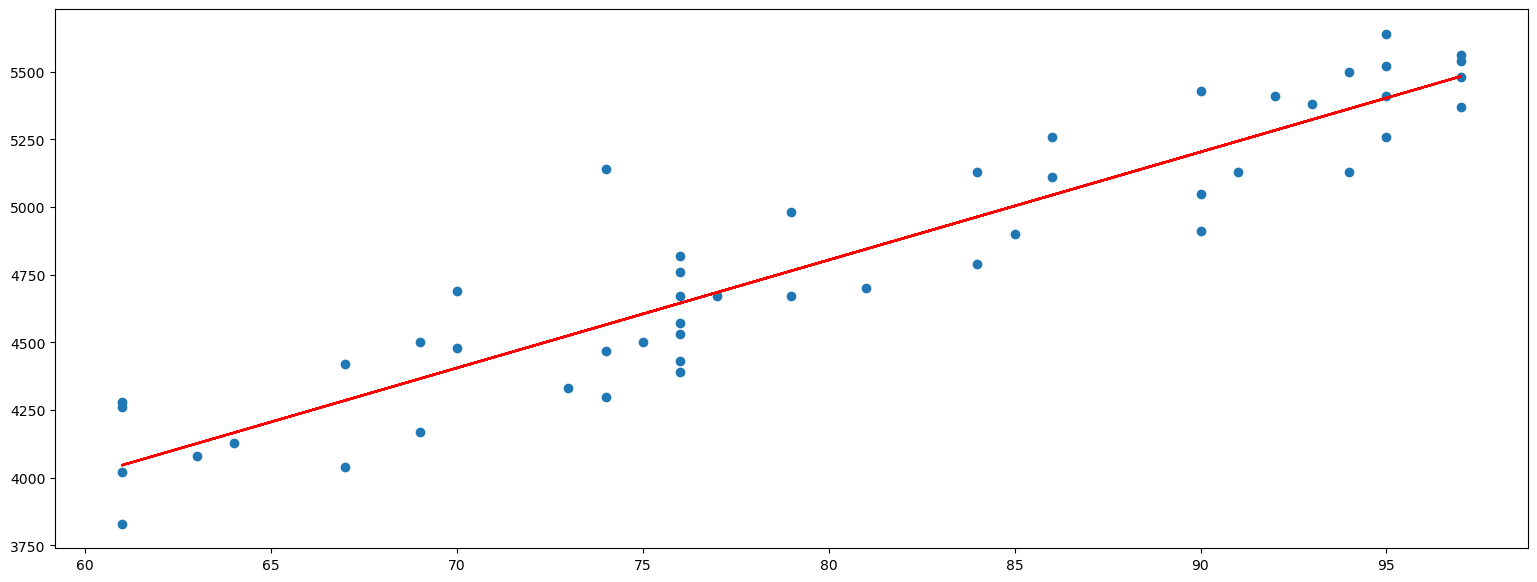

In [38]:
plt.figure(figsize = (19,7))
plt.scatter(x,y)
plt.plot(x,y_pred,color = 'r')

# Example

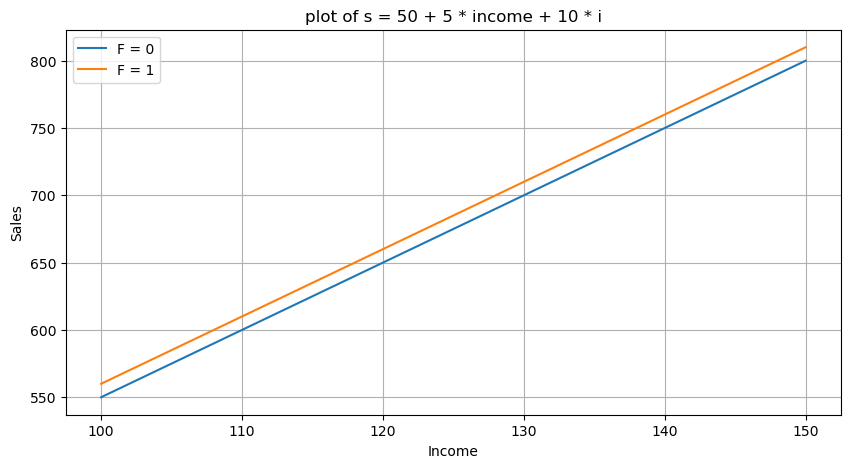

In [55]:
# Define Features
income = np.linspace(100,150,500)
f = [0,1]
plt.figure(figsize = (10,5))

for i in f:
    s = 50 + 5 * income + 10 * i
    label = f'F = {i}'
    plt.plot(income,s,label=label)

plt.xlabel('Income')
plt.ylabel('Sales')
plt.title('plot of s = 50 + 5 * income + 10 * i')
plt.legend()
plt.grid(True)
plt.show()


## Virgina Semi Conductors

In [58]:
df1 = pd.read_csv(r"C:\Users\rajes\OneDrive\Desktop\Praxis\Term 2\MSE\data-20241017T032734Z-001\data\virginia semiconductors.csv")
df1.head()

,Size_of_Purchase,Company_Size,%Imports,Distance,Central_Purchaser
0,27.9,25.6,41,18,0
1,89.6,109.8,16,75,0
2,12.8,39.4,29,14,0
3,34.9,16.7,31,117,0
4,408.6,278.4,14,209,1


### Size_of_purchase(sop) = C + α1*company_size - α2*imports - α3*distance + α4*central_purchaser(cp)


In [64]:
y = df1[['Size_of_Purchase']]
x = df1.drop('Size_of_Purchase',axis=1)
xc = sm.add_constant(x)

In [66]:
model = sm.OLS(y,xc).fit()
model.summary()

C:\Users\rajes\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Size_of_Purchase   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     55.00
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.28e-07
Time:                        10:16:23   Log-Likelihood:                -82.436
No. Observations:                  17   AIC:                             174.9
Df Residuals:                      12   BIC:                             179.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.6686     30.107     -0.122      0.905     -69.266      61.929
Company_Size          1.2687      0.200      6.355      0.000       0.834       1.704
%Imports              0.0508      0.865      0.059      0.954      -1.834       1.936
Distance             -0.2204      0.256     -0.860      0.407      -0.779       0.338
Central_Purchaser   127.3502     23.880      5.333      0.000      75.321     179.380
==============================================================================
Omnibus:                        2.223   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.588
Skew:                          -0.727   Prob(JB):                        0.452
Kurtosis:                       2.640   Cond. No.                         542.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### In linear regression we should not drop constant , even if its not significant. If we do, we for the pred line to pass from origin.

In [71]:
xc=xc.drop(['%Imports','Distance'],axis=1)
xc.head()

,const,Company_Size,Central_Purchaser
0,1.0,25.6,0
1,1.0,109.8,0
2,1.0,39.4,0
3,1.0,16.7,0
4,1.0,278.4,1


In [73]:
model = sm.OLS(y,xc).fit()
model.summary()

C:\Users\rajes\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Size_of_Purchase   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     114.7
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           2.09e-09
Time:                        10:20:41   Log-Likelihood:                -83.341
No. Observations:                  17   AIC:                             172.7
Df Residuals:                      14   BIC:                             175.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -8.5394     15.758     -0.542      0.596     -42.338      25.259
Company_Size          1.1961      0.146      8.182      0.000       0.883       1.510
Central_Purchaser   126.9089     21.396      5.931      0.000      81.019     172.799
==============================================================================
Omnibus:                        2.894   Durbin-Watson:                   1.423
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                2.284
Skew:                          -0.830   Prob(JB):                        0.319
Kurtosis:                       2.318   Cond. No.                         320.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Size_of_Purchase = -8.54 + 1.196*company_size + 126.9 * Central_Purchaser

In [76]:
y_pred = model.predict(xc)

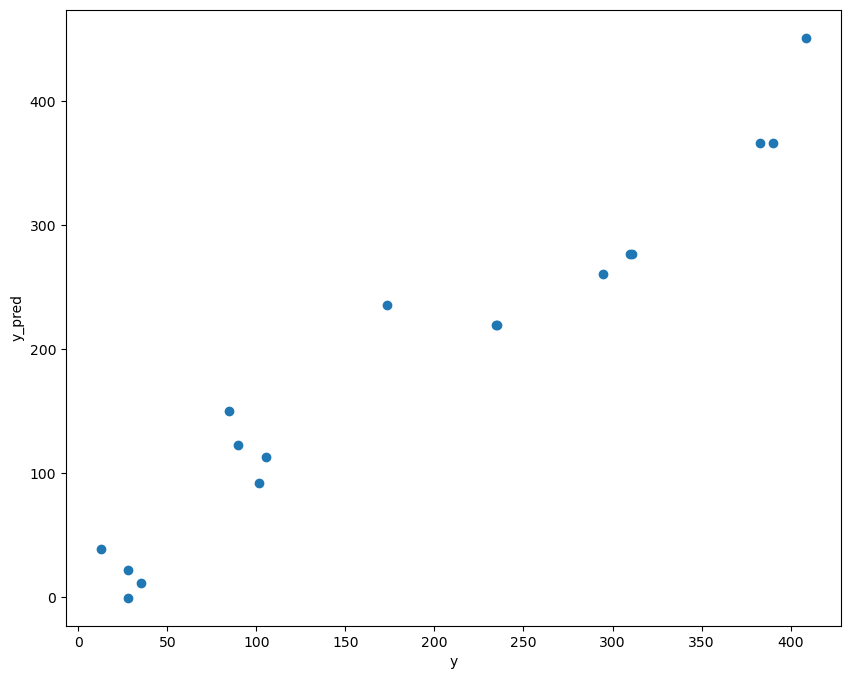

In [78]:
plt.figure(figsize = (10,8))
plt.scatter(y,y_pred)
plt.xlabel('y')
plt.ylabel('y_pred')
plt.show()

<Axes: xlabel='Size_of_Purchase'>

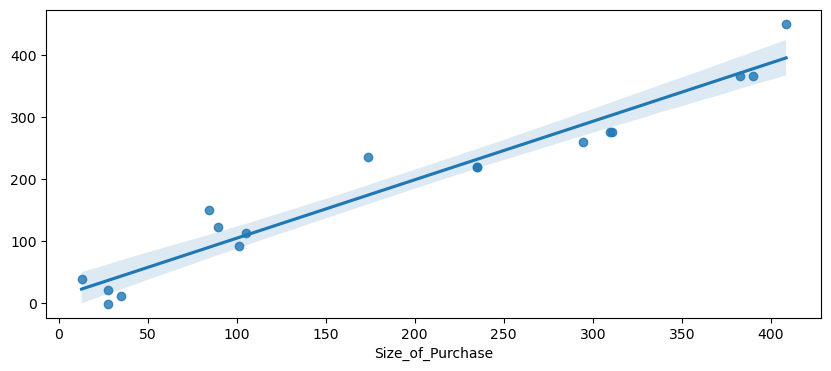

In [80]:
plt.figure(figsize=(10,4))
sns.regplot(x=y,y=y_pred)